# Latest COVID-19 India Matplotlib Overview 

## Covid cases from 5th May 2021

In [1]:
#hide
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline
from datetime import date

In [2]:
#hide
df  = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
df = df[['Date','State','Confirmed','Deceased']]
df = df.rename(columns={'Confirmed':'Cases', "Deceased":'Deaths'})
df_cases = df[["Date",'State','Cases']]
df_deaths = df[['Date','State','Deaths']]
df_cases1 = df_cases.groupby('Date')
df_deaths1= df_deaths.groupby('Date')

In [3]:
#hide
df_snap = pd.read_csv('data/SnapshotCases-28-July.csv')
arr_states = df_snap['states'].unique()
arr_dates = df['Date'].unique()
df_snap = df_snap.set_index('states')

In [4]:
#hide
arr_states[-9] = 'Puducherry'
arr_states[-10] = 'Odisha'
arr_states[6] = 'Dadra and Nagar Haveli and Daman and Diu'
arr_states = np.append(arr_states,np.array(['Chhattisgarh','Ladakh','Uttarakhand']))
arr_states

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Ladakh', 'Uttarakhand'],
      dtype=object)

In [5]:
#hide
dates = []
for i in arr_dates:
    if i>='2021-05-10':
        dates.append(i)
dict = {'states':dates}
for i in arr_states:
    dict[i] = [0]*len(dates)
dft_cases = pd.DataFrame(dict)
dft_deaths = pd.DataFrame(dict)


In [6]:
#hide
for i in range(len(dates)):
    df1_deaths = df_deaths1.get_group(dates[i])
    for j in range(len(df1_deaths.index)):
        if df1_deaths.iloc[j,1] in arr_states:
            dft_deaths.loc[i,df1_deaths.iloc[j,1]] = df1_deaths.iloc[j,2]
dft_deaths = dft_deaths.set_index('states')

In [7]:
#hide
for i in range(len(dates)):
    df1_cases = df_cases1.get_group(dates[i])
    for j in range(len(df1_cases.index)):
        if df1_cases.iloc[j,1] in arr_states:
            dft_cases.loc[i,df1_cases.iloc[j,1]] = df1_cases.iloc[j,2]
dft_cases = dft_cases.set_index('states')

In [8]:
#hide
dft_cases = dft_cases.T
dft_deaths = dft_deaths.T
dt_today = dates[-1]
dt_yday = dates[-2]

In [9]:
#hide
dft_cases = dft_cases.reset_index()
dft_deaths = dft_deaths.reset_index()
dft_cases = dft_cases.rename(columns = {'index':'state'})
dft_deaths = dft_deaths.rename(columns = {'index':'state'})

In [10]:
#hide
dfc_cases = dft_cases.groupby('state')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('state')[dt_today].sum()
dfp_cases = dft_cases.groupby('state')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('state')[dt_yday].sum()

In [11]:
#hide
df_table = pd.DataFrame({'states': dfc_cases.index, 'Cases': dfc_cases.values, 'Deaths': dfc_deaths.values, 'PCases': dfp_cases.values, 'PDeaths': dfp_deaths.values}).set_index('states')
df_table = df_table.sort_values(by = ['Cases','Deaths'], ascending = [False, False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,6165402,126024,6165402,126024
1,Kerala,3073134,14686,3073134,14686
2,Karnataka,2874597,35944,2872684,35896
3,Tamil Nadu,2521438,33454,2521438,33454
4,Andhra Pradesh,1926988,13042,1924421,13024


In [12]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [13]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,6165402,126024,6165402,126024,0,0,2.04
1,Kerala,3073134,14686,3073134,14686,0,0,0.48
2,Karnataka,2874597,35944,2872684,35896,1913,48,1.25
3,Tamil Nadu,2521438,33454,2521438,33454,0,0,1.33
4,Andhra Pradesh,1926988,13042,1924421,13024,2567,18,0.68


In [14]:
#hide
summary = {'updated':dates[-1], 'since':dates[-2]}
list_names = ['Cases', 'PCases', 'Deaths', 'PDeaths', 'Cases (+)', 'Deaths (+)']
for name in list_names:
    summary[name] = df_table.sum()[name]
summary

{'updated': '2021-07-13',
 'since': '2021-07-12',
 'Cases': 30916116,
 'PCases': 30904734,
 'Deaths': 411024,
 'PDeaths': 410816,
 'Cases (+)': 11382,
 'Deaths (+)': 208}

In [15]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [16]:
#hide_input
update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [17]:
#hide
dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('state')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dates[-1], ascending = False,inplace = True)

In [18]:
#hide
dft_ct_new_cases.head()

states,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,...,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13
state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,0,20345,21452,22399,22018,22517,24171,18561,21320,23160,...,3175,2100,3042,3166,2982,3040,2925,2665,1578,2567
Odisha,0,9793,10982,10649,12390,11805,11732,10757,10321,11099,...,2870,2803,2487,2602,2542,2806,2334,2282,1993,1930
Karnataka,0,39510,39998,35297,41779,41664,31531,38603,30309,34281,...,1564,2848,3104,2743,2530,2290,2162,1978,1386,1913
West Bengal,0,20136,20377,20839,20846,19511,19117,19003,19428,19006,...,1297,885,962,982,995,990,997,924,885,863
Manipur,0,592,666,560,726,730,677,330,624,582,...,643,432,863,760,839,852,788,911,890,796


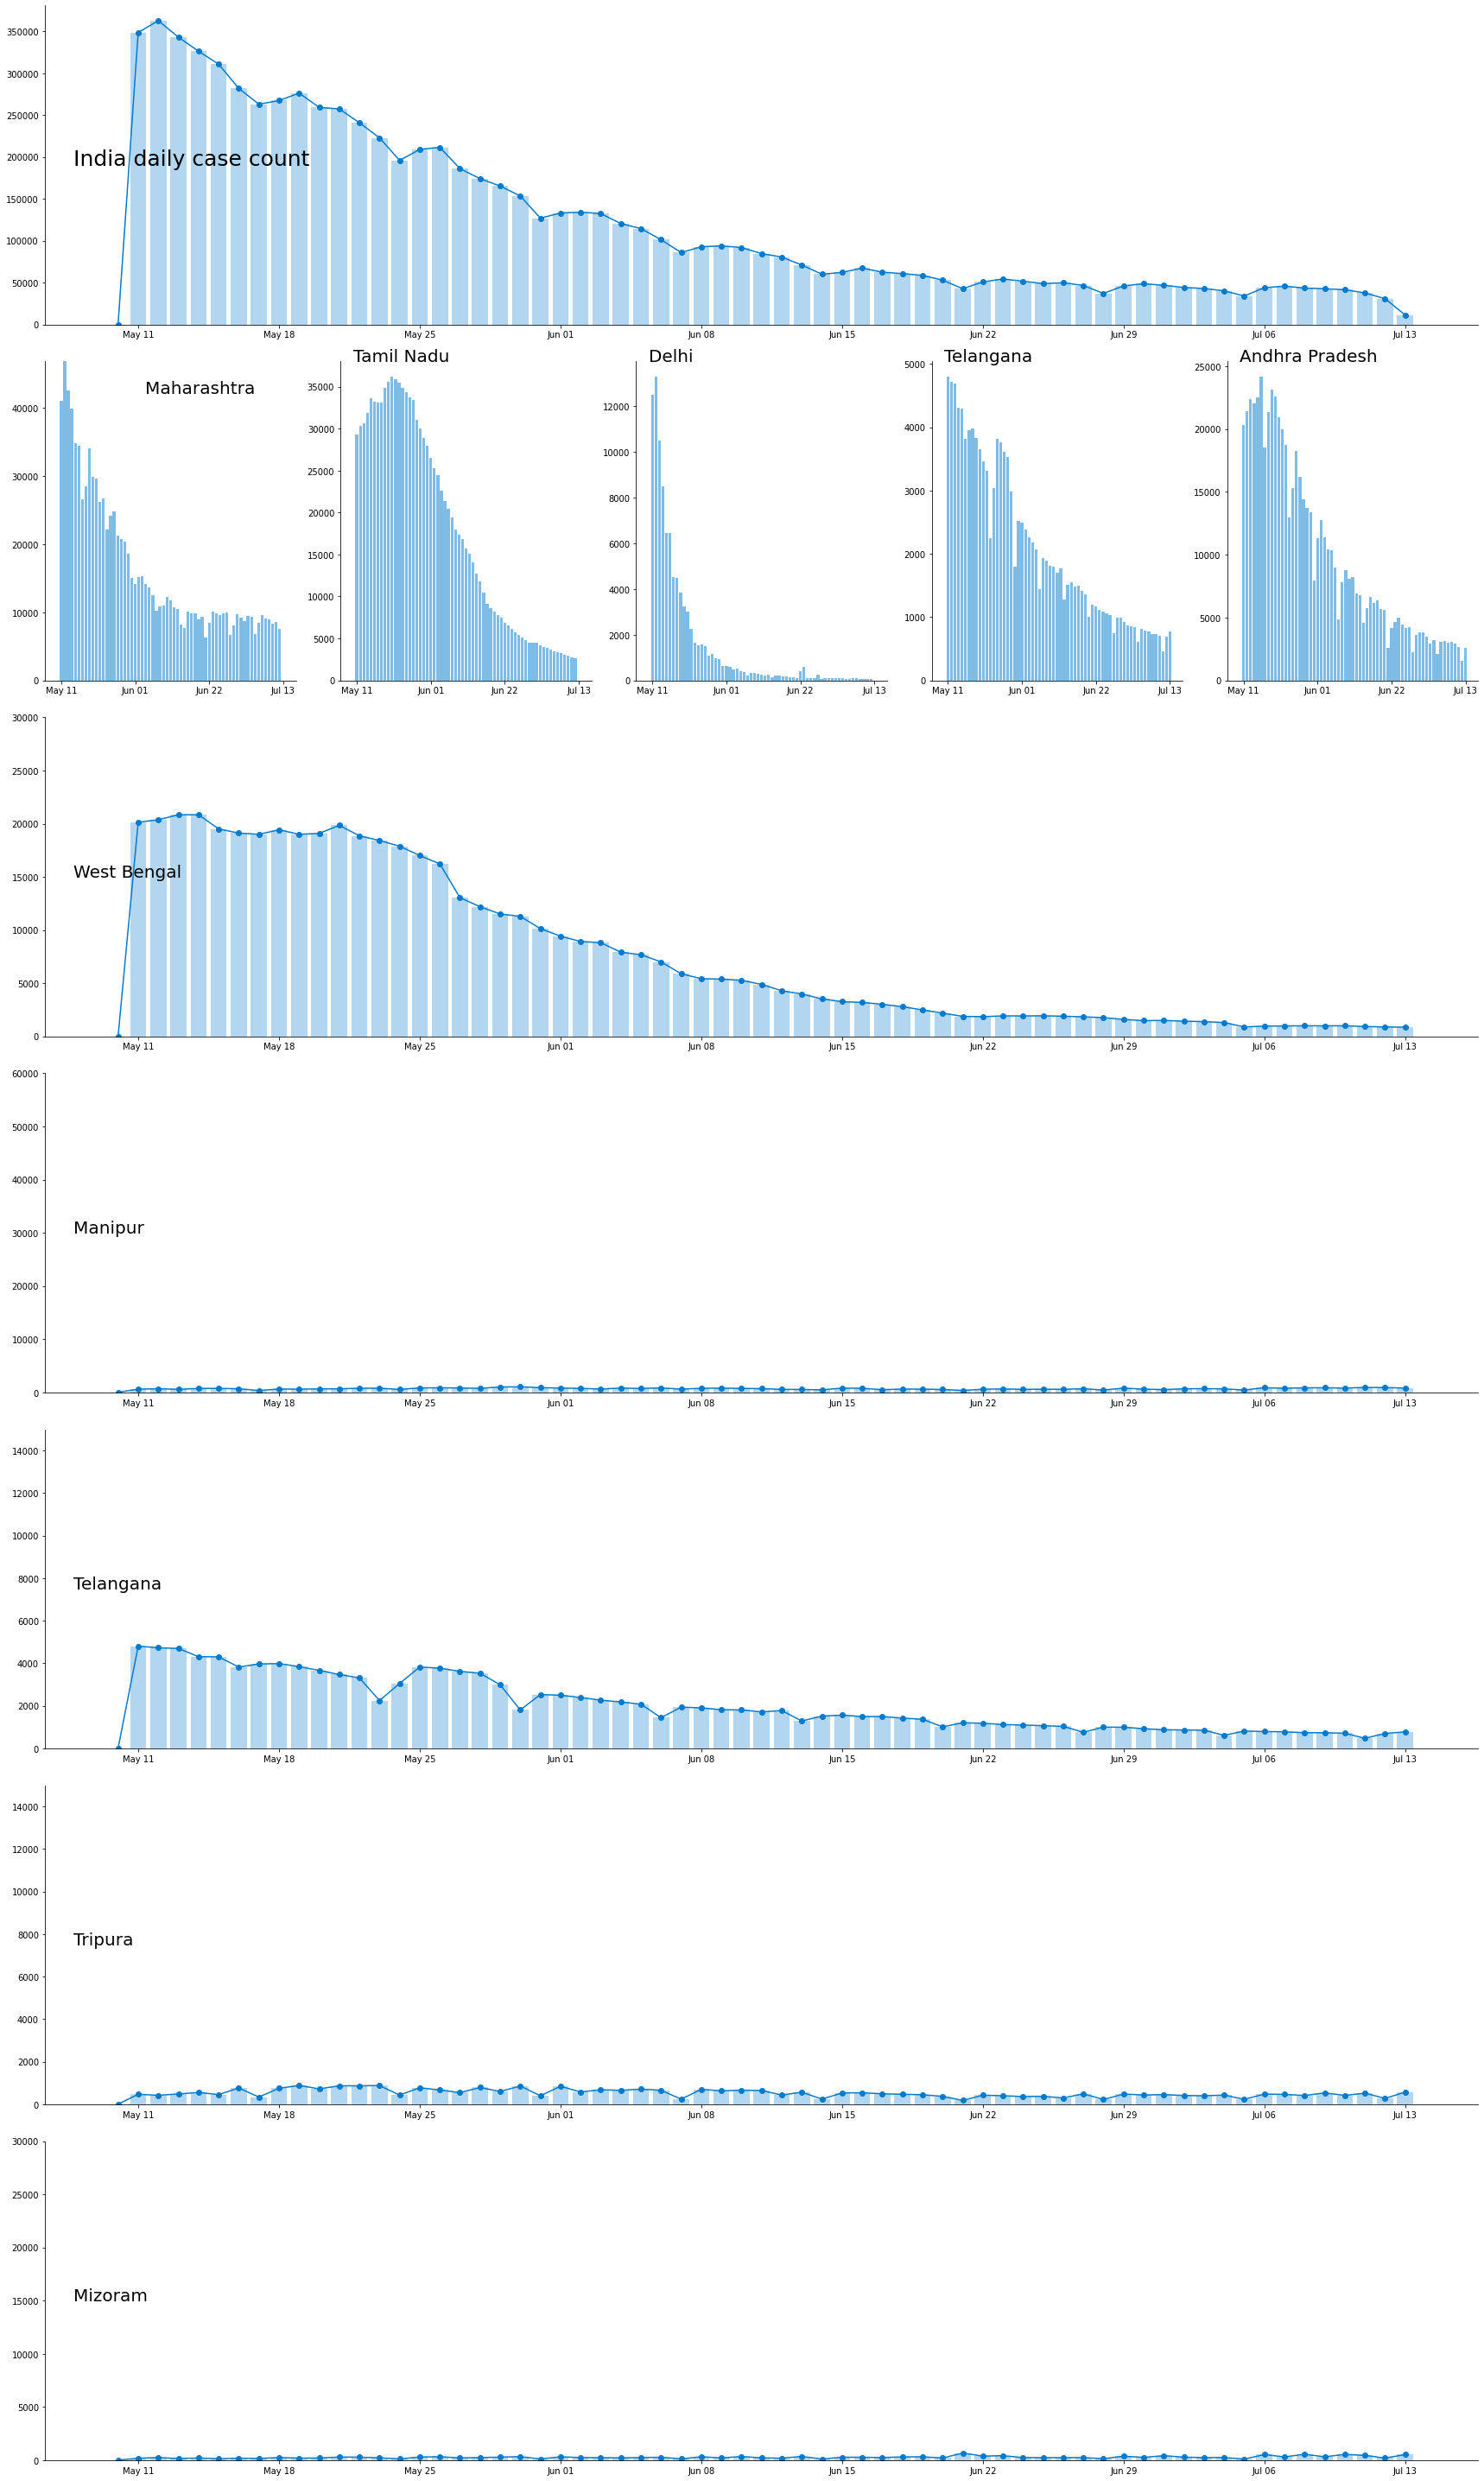

In [19]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (24,40))
gs = fig.add_gridspec(n+2, 5)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.4, 0.9,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 1,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax5 = fig.add_subplot(gs[1,3])
ef = df.loc['Telangana'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax5.bar(ef.date, ef['Telangana'],color = '#007acc',alpha=0.5,)
ax5.xaxis.set_major_locator(mdates.WeekdayLocator())
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax5.set_xticks(ax5.get_xticks()[::3])
ax5.text(0.05, 1,'Telangana', transform = ax5.transAxes, fontsize=20);
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

ax6 = fig.add_subplot(gs[1,4])
ef = df.loc['Andhra Pradesh'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax6.bar(ef.date, ef['Andhra Pradesh'],color = '#007acc',alpha=0.5,)
ax6.xaxis.set_major_locator(mdates.WeekdayLocator())
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax6.set_xticks(ax6.get_xticks()[::3])
ax6.text(0.05, 1,'Andhra Pradesh', transform = ax6.transAxes, fontsize=20);
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 1,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    if i in [0,4]:
        ax[i].set_ylim([0,30000])
    elif i==1:
        ax[i].set_ylim([0,60000])      
    else:
        ax[i].set_ylim([0,15000])
    
plt.tight_layout()


In [20]:
#hide_input
print(df_table.to_string(index=False))

                                   states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                              Maharashtra  6165402  126024  6165402   126024          0           0           2.04
                                   Kerala  3073134   14686  3073134    14686          0           0           0.48
                                Karnataka  2874597   35944  2872684    35896       1913          48           1.25
                               Tamil Nadu  2521438   33454  2521438    33454          0           0           1.33
                           Andhra Pradesh  1926988   13042  1924421    13024       2567          18           0.68
                            Uttar Pradesh  1707446   22700  1707446    22700          0           0           1.33
                              West Bengal  1513877   17944  1513014    17927        863          17           1.19
                                    Delhi  1435128   25018  1435128    25018    